# DBSCAN

DBSCAN is a density-based clustering algorithm.
Instead of trying to fit clusters with a specific shape (like k-means), it groups points that are close together and marks points in sparse areas as noise.

Pros:

- Handles clusters of arbitrary shapes (e.g., moons, spirals).

- Can naturally identify noise/outliers.

- Does not require specifying the number of clusters in advance.


Cons:

- Very sensitive to the choice of eps and min_samples.

- Struggles when clusters have different densities (one dense cluster + one sparse cluster → hard to separate).

In [2]:
import numpy as np

# Fully AI generated, just for learning purposes

def dbscan(X, eps, min_samples):
    n = len(X)
    labels = np.full(n, -1)  # initialize all labels to -1 (used for noise)
    visited = np.zeros(n, dtype=bool)
    cluster_id = 0

    def region_query(point_idx):
        # distance from X[point_idx] to all other points
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        return np.where(distances <= eps)[0]

    for i in range(n):
        if visited[i]:
            continue
        visited[i] = True

        neighbors = region_query(i)

        if len(neighbors) < min_samples:
            labels[i] = -1  # noise
        else:
            # start new cluster
            labels[i] = cluster_id
            # expand cluster
            stack = list(neighbors)

            while stack:
                j = stack.pop()
                if not visited[j]:
                    visited[j] = True
                    new_neighbors = region_query(j)
                    # if j has enough neighbors, it's a core point
                    if len(new_neighbors) >= min_samples:
                        stack.extend(new_neighbors)

                # assign to cluster if not yet assigned
                if labels[j] == -1:
                    labels[j] = cluster_id

            cluster_id += 1

    return labels

Let's try how it works compared to KMeans on moon shaped clusters:

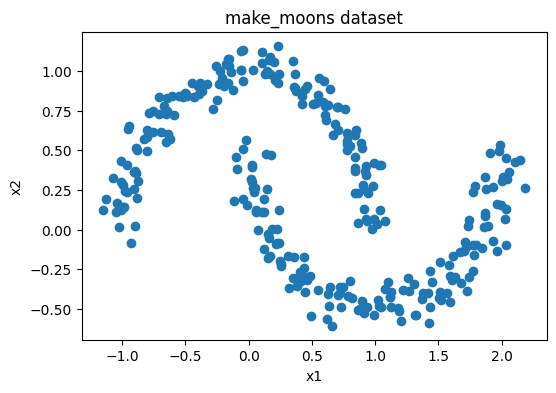

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.07, random_state=42)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.title("make_moons dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Let's see how KMeans handles this:

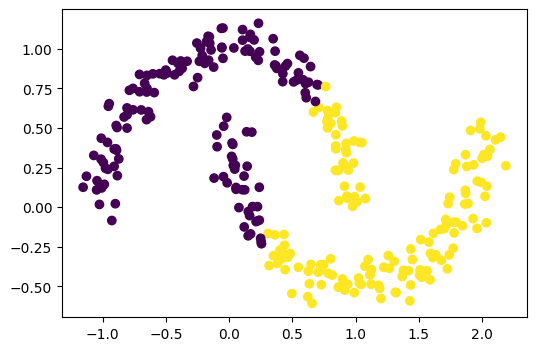

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

Obviously not well since it assumes the clusters are spherical.

Let's see if DBSCAN performs better:

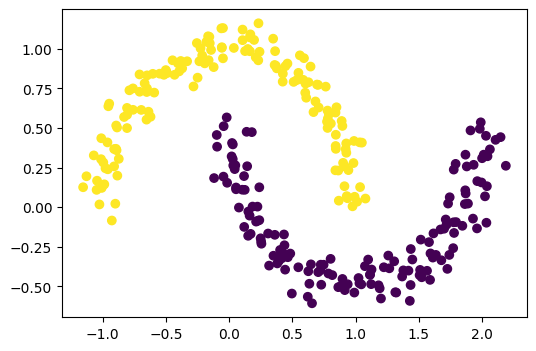

In [5]:
labels = dbscan(X, eps=0.3, min_samples=2)


plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

This clustering looks better than KMeans!

It can be implemented with the sklearn library as follows:

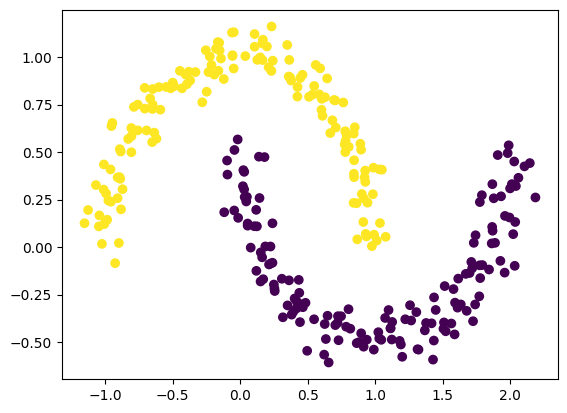

: 

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.show()